# Entrenamiento de clasificadores basados en árboles de decisión y reglas en *scikit-learn*
En este notebook aprenderás a crear árboles de decisión de distinto tipo y utlizando varios parámetros de los mismos en Python gracias a la librería *scikit-learn*. Además, también se verán distintas formas de visualizar estos clasificadores, de manera que podamos interpretar facilmente las salidas que producen para un patrón dado.

Es recomendable tener en todo momento disponible la [Guía de usuario](https://scikit-learn.org/stable/user_guide.html), concretamente el apartado de [árboles de decisión](https://scikit-learn.org/stable/modules/tree.html); o la documentación de la [API](https://scikit-learn.org/stable/modules/classes.html) de *scikit-learn*.

## 1.   Carga de datos

En primer lugar, como de costumbre, vamos a cargar los datos que utilizaremos en el resto del notebook. Para seguir este notebook, vamos a utilizar el conjunto de datos de [*Breast Cancer*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Pese a utilizar por defecto este conjunto de datos, se espera que el alumno ejecute y entienda primero las distintas celdas de este notebook utilizando este dataset; y posteriormente, seleccione otro conjunto de datos de clasificación y vuelva a ejecutarlas sobre el nuevo conjunto. Así, se espera que pueda analizar y comprender el funcionamiento de los métodos con distintas elecciones de parámetros en otros escenarios, que no tienen por qué comportarse igual que con el conjunto utilizado por defecto.


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Cargamos el conjunto de datos Cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Para estos primeros ejemplos, utilizaremos un 80% de las instancias para entrenamiento y el 20% restante para test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## 2. Construcción de árboles de decisión

Una vez tenemos los datos cargados, procederemos a construir métodos de árboles de decisión.

Cabe destacar, que de momento, *scikit-learn* solo permite la construcción de árboles binarios, por lo que la implementación no respeta 100% la de los algoritmos originales como C4.5 (que sí permite más de 2 ramificaciones por nodo). Sin embargo, estos árboles son igualmente válidos para resolver problemas de clasificación.


In [2]:
from sklearn import tree
from sklearn.metrics import *

# Entrenamos el clasificador con los parámetros por defecto sobre los datos de entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Visualizamos la predicción sobre datos de test
y_pred = clf.predict(X_test)

# Y algunas métricas
accuracy = accuracy_score(y_test, y_pred)
print('  acc: ' + str(accuracy))
f1 = f1_score(y_test, y_pred)
print('  f1: ' + str(f1))


# Por defecto, DecisionTreeClassifier, utiliza el criterio gini para generar los árboles (como CART)
# También se le puede indicar que utilice un criterio basado en la entropía (ganancia de información), 
#   como C4.5. Como se comentaba antes, no será fielmente un árbol C4.5 porque las particiones
#   serán binarias, pero el criterio para el particionado si será el mismo
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_entropy)
print('  acc entropy: ' + str(accuracy))
f1 = f1_score(y_test, y_pred_entropy)
print('  f1 entropy: ' + str(f1))

  acc: 0.9122807017543859
  f1: 0.923076923076923
  acc entropy: 0.8947368421052632
  f1 entropy: 0.9062499999999999


In [3]:
# Imprimimos cierta información de la complejidad del árbol generado
print("Profundidad: " + str(clf.get_depth()))
print("Número de nodos: " + str(clf.tree_.node_count))
print("Número de nodos hoja: " +  str(clf.tree_.n_leaves))

Profundidad: 9
Número de nodos: 43
Número de nodos hoja: 22


[Text(213.94008620689655, 206.56799999999998, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(162.34913793103448, 184.824, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(128.4362068965517, 163.07999999999998, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(95.2448275862069, 141.336, 'X[28] <= 0.157\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(83.7, 119.592, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(106.78965517241379, 119.592, 'X[13] <= 48.975\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(75.04137931034482, 97.848, 'X[6] <= 0.139\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(46.179310344827584, 76.10399999999998, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(23.089655172413792, 54.360000000000014, 'X[23] <= 756.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(11.544827586206896, 32.615999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'

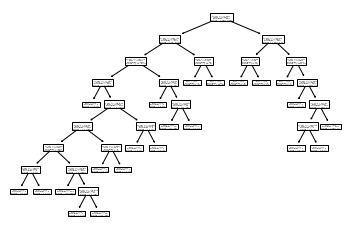

In [4]:
# Podemos imprimir el árbol de forma sencilla con la función plot
tree.plot_tree(clf)

In [5]:
# Sin embargo, la librería graphviz nos ofrece utilizidades para mostrarlos de forma gráfica de una manera mucho más amigable
!pip install graphviz

import graphviz 
def plot_tree(clf, data):
  dot_data = tree.export_graphviz(clf, out_file=None, 
                                  feature_names=data.feature_names,
                                  class_names=data.target_names,
                                  filled=True, rounded=True,
                                  special_characters=True) 
  return graphviz.Source(dot_data) 
plot_tree(clf, data)

     |████████████████████████████████| 46 kB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/juanjomendeztorrero/Library/Caches/pypoetry/virtualenvs/master-pvd-lswVkwae-py3.9/bin/python -m pip install --upgrade pip' command.


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

En primer lugar, se aconseja al estudiante utilizar unos minutos observando el árbol generado de forma gráfica en la celda anterior, analizando la información de los nodos, el significado de cada partición, y cómo se generaría la predicción para un nuevo patrón dado.

Una vez en este punto, podemos observar que el árbol generado es bastante complejo, con una gran profundidad (*nótese que la estructura y profundidad del árbol puede depender de los datos de entrenamiento seleccionados*). Árboles tan complejos como este, se ajustan tanto a los datos de entrenamiento, que en test puede que obtengan peores resultados. Por ello, a continuación vamos a utilizar distintos parámetros para restringir la complejidad de los árboles y observar sus resultados.

In [ ]:
# Entrenar un modelo con profundidad máxima 
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
# plot_tree(clf, data)

# Entrenar un modelo con un valor mínimo de datos en un nodo para realizar una partición
#   Si el parámetro es un entero: cualquier nodo dicho número de patrones o menos, se considera ya un nodo hoja
#   Si el parámetro es un número real: mismo funcionamiento pero funciona como ratio de patrones de entrenamiento
clf = tree.DecisionTreeClassifier(min_samples_split=0.1) # Un nodo con menos de 10% de nodos de entrenamiento se considera nodo hoja
clf = clf.fit(X_train, y_train)
# plot_tree(clf, data)

# Entrenar un modelo con un máximo de nodos hoja 
clf = tree.DecisionTreeClassifier(max_leaf_nodes=8)
clf = clf.fit(X_train, y_train)
# plot_tree(clf, data)

# Entrenar un modelo reduciendo el número de atributos a considerar sus particiones en cada nodo
# Por defecto, en cada nodo explora las particiones de todos los atributos posibles, pero así
#   se puede restringir su número.
clf = tree.DecisionTreeClassifier(max_features='sqrt') # max_features='log2'
clf = clf.fit(X_train, y_train)
# plot_tree(clf, data)

## 3. Análisis del rendimiento de los árboles de decisión

Por último, vamos a realizar un análisis del rendimiento de distintos árboles de decisión con distintos parámetros, para observar si se produce o no sobre-ajuste de los datos de entrenamiento.

En este caso, vamos a utilizar la función ``cross_validate`` de *sklearn* para realizar un proceso de *k-folds cross-validation* y así obtener unas métricas más consistentes para la comparación. A la función ``cross_validate`` le pasamos el conjunto completo de datos (``X`` e ``y``), ya que internamente se encargará de realizar las particiones de entrenamiento y test en cada caso. Además, el proceso se repetirá varias veces, promediando los resultados entre las distintas ejecuciones.

En primer lugar, vamos a analizar el rendimiento del modelo modificando la profundidad máxima del árbol, y luego utilizaremos otros parámetros para proseguir con el análisis.

In [ ]:
from sklearn.model_selection import cross_validate
from statistics import mean

print('Modelo base; sin profundidad máxima')

# Generamos modelo
clf = tree.DecisionTreeClassifier(random_state=0)

# Aplicamos cross-validación con dicho modelo. Obtenemos dos métricas en train y test
scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'f1'), return_train_score=True)

# Imprimimos métricas en test del modelo base
print('  Accuracy: ' + "{:.4f}".format(mean(scores['test_accuracy'])))
print('  F1: ' + "{:.4f}".format(mean(scores['test_f1'])))

# Almacenamos todas las métricas del modelo base
base_accuracy = mean(scores['test_accuracy'])
base_f1 = mean(scores['test_f1'])
base_accuracy_train = mean(scores['train_accuracy'])
base_f1_train = mean(scores['train_f1'])

# Iremos almacenando el valor medio de las distintas métricas en train y test
#   para cada valor de los parámetros
accuracy = []
f1 = []
accuracy_train = []
f1_train = []

# Vamos a utilizar valores de profundidad máxima desde 1 hasta 11 (0 no está definido)
for i in range(1, 11):
  # Repetiremos el proceso de cross-validación varias veces, promediando los resultados
  n_seeds = 10

  # Variables para almacenar los resultados de cada repetición
  curr_accuracy, curr_f1, curr_accuracy_train, curr_f1_train = [], [], [], []

  # Para cada semilla distinta de números aleatorios
  for s in range(n_seeds):
    # Creamos modelo con semilla y profundidad indicada
    clf = tree.DecisionTreeClassifier(random_state=s, max_depth=i)

    # Aplicamos cross-validación sobre el modelo
    scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'f1'), return_train_score=True)

    # Añadimos a las variables auxiliares los resultados promediados de esta cross-validación
    curr_accuracy.append(mean(scores['test_accuracy']))
    curr_f1.append(mean(scores['test_f1']))
    curr_accuracy_train.append(mean(scores['train_accuracy']))
    curr_f1_train.append(mean(scores['train_f1']))

  # Promediamos los resultados de todas las repeticiones, y los almacenamos
  accuracy.append(mean(curr_accuracy))
  f1.append(mean(curr_f1))
  accuracy_train.append(mean(curr_accuracy_train))
  f1_train.append(mean(curr_f1_train))

# Añadir el del modelo base sin restricción al final de los resultados
accuracy.append(base_accuracy)
f1.append(base_f1)
accuracy_train.append(base_accuracy_train)
f1_train.append(base_f1_train)

In [ ]:
import matplotlib.pyplot as plt

# Generar gráfica con los resultados de test
fig, ax = plt.subplots()
line1, = ax.plot(range(1,12), f1, label='F1 test')
line2, = ax.plot(range(1,12), accuracy, label='Accuracy test')
ax.legend()
plt.show()

# Generar gráfica con los resultados de entrenamiento
figB, axB = plt.subplots()
line3, = axB.plot(range(1,12),f1_train, dashes=[6, 2], label='F1 train')
line4, = axB.plot(range(1,12),accuracy_train, dashes=[6, 2], label='Accuracy train')
axB.legend()
plt.show()

In [ ]:
# Imprimimos accuracy y f1 en test del mejor modelo --> Mejor resultado en test (no en entrenamiento)
#   (en otro caso quizá habrá que cambiar el indice, dependiendo de los resultados)
print('Accuracy: ' "{:.4f}".format(accuracy[1])) # max_depth = 2 está en la celda 1 de la lista; recordemos que max_depth=0 no está definido
print('F1: ' "{:.4f}".format(f1[1]))

En este punto, se espera que el estudiante se pare a analizar las gráficas generadas en la última celda.

**PREGUNTA:** ¿A qué se debe el comportamiento del modelo al variar los parámetros? ¿Por qué las gráficas de resultados en entrenamiento y test no evolucionan de la misma manera?



In [ ]:
from sklearn.model_selection import cross_validate
from statistics import mean

print('Modelo base; sin número mínimo de patrones para realizar el particionado')

# Generamos modelo
clf = tree.DecisionTreeClassifier(random_state=0)

# Aplicamos cross-validación con dicho modelo. Obtenemos dos métricas en train y test
scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'f1'), return_train_score=True)

# Imprimimos métricas en test del modelo base
print('  Accuracy: ' + "{:.4f}".format(mean(scores['test_accuracy'])))
print('  F1: ' + "{:.4f}".format(mean(scores['test_f1'])))

# Almacenamos todas las métricas del modelo base
base_accuracy = mean(scores['test_accuracy'])
base_f1 = mean(scores['test_f1'])
base_accuracy_train = mean(scores['train_accuracy'])
base_f1_train = mean(scores['train_f1'])

# Iremos almacenando el valor medio de las distintas métricas en train y test
#   para cada valor de los parámetros
accuracy = []
f1 = []
accuracy_train = []
f1_train = []

# Añadir el del modelo base sin restricción al principio de los resultados
accuracy.append(base_accuracy)
f1.append(base_f1)
accuracy_train.append(base_accuracy_train)
f1_train.append(base_f1_train)

# Valores a utilizar para el parámetro
values = [2, 5, 10, 25, 50]

# Vamos a utilizar valores de profundidad máxima desde 1 hasta 11 (0 no está definido)
for i in values:
  # Repetiremos el proceso de cross-validación varias veces, promediando los resultados
  n_seeds = 10

  # Variables para almacenar los resultados de cada repetición
  curr_accuracy, curr_f1, curr_accuracy_train, curr_f1_train = [], [], [], []

  # Para cada semilla distinta de números aleatorios
  for s in range(n_seeds):
    # Creamos modelo con semilla y profundidad indicada
    clf = tree.DecisionTreeClassifier(random_state=s, min_samples_split=i)

    # Aplicamos cross-validación sobre el modelo
    scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'f1'), return_train_score=True)

    # Añadimos a las variables auxiliares los resultados promediados de esta cross-validación
    curr_accuracy.append(mean(scores['test_accuracy']))
    curr_f1.append(mean(scores['test_f1']))
    curr_accuracy_train.append(mean(scores['train_accuracy']))
    curr_f1_train.append(mean(scores['train_f1']))

  # Promediamos los resultados de todas las repeticiones, y los almacenamos
  accuracy.append(mean(curr_accuracy))
  f1.append(mean(curr_f1))
  accuracy_train.append(mean(curr_accuracy_train))
  f1_train.append(mean(curr_f1_train))

# Generar gráfica con los resultados de test
fig, ax = plt.subplots()
line1, = ax.plot([0] + values, f1, label='F1 test')
line2, = ax.plot([0] + values, accuracy, label='Accuracy test')
ax.legend()
plt.show()

# Generar gráfica con los resultados de entrenamiento
figB, axB = plt.subplots()
line3, = axB.plot([0] + values,f1_train, dashes=[6, 2], label='F1 train')
line4, = axB.plot([0] + values,accuracy_train, dashes=[6, 2], label='Accuracy train')
axB.legend()
plt.show()

Ahora, se le propone al estudiante que no analice el comportamiento del árbol de decisión en base a un único parámetro (como hasta ahora, hemos probado ``max_depth`` y ``min_samples_split``), sino que realice el estudio de parámetros en base a varios parámetros a la vez.

**PREGUNTAS:**

*   ¿Qué resultados arrojan los distintos métodos y qué conclusiones puede obtener de dicho proceso?
*   ¿Qué modelo escogería para utilizar sobre nuevos datos de test?




## 4. Generación de reglas a partir de un árbol de decisión

En último lugar, aunque *scikit-learn* de momento no da la opción de obtener reglas a partir del árbol de decisión, o de inferir un conjunto de reglas como clasificador, sí que podemos utilizar la función a continuación para, a partir de un árbol de decisión, obtener un conjunto de reglas IF-THEN (en formato de pseudocódigo) que podríamos utilizar posteriormente para clasificar nuevos patrones tras ajustarlo al lenguaje de clasificación específico.

Código obtenido de [Daniele](https://stackoverflow.com/users/1885917/daniele) en [StackOverflow](https://stackoverflow.com/a/30104792/11807784).

In [ ]:
from sklearn import tree

def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [ ]:
# Volvemos a entrenar un arbol sencillo
clf = tree.DecisionTreeClassifier(max_leaf_nodes=8)
clf = clf.fit(X_train, y_train)

In [ ]:
# Obtenemos las reglas de asociacion a partir del arbol
get_code(clf, data.feature_names)